# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
data_frames_lst = [heroes_df, powers_df]
for frame in data_frames_lst:
    
    display(frame.describe())
    print('\n')
    display(frame.info())
    print('\n\n')

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Box IV,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




For the heroes_df dataframe:
1. Skin color looks to have a majority of missing data.  It can be dropped
2. I can use the name column to see if there are any duplicate names and drop them based on the other data in the        other columns.
3. Height and weight seem to have obscure values at -99.  
4. Gender has a small amount of missing values
5. Publisher has 15 null values

1. Drop Skin color

In [5]:
heroes_df.drop(columns='Skin color', inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0


2. Check name for duplicates and significant data in each row 

In [6]:
hero_dup_df = heroes_df[heroes_df['name'].duplicated(keep=False)]

After looking through the duplicate names, I noticed that there were some duplicates that are missing data, or containing bad data, in the eye color, race, hair color, height and weight categories.  Any duplicate that has three dashes and -99 in the height and weight columns should be dropped.

In [7]:
#I want to utilize the .dropna() method so I'm going to convert anything with a '-' or -99.0 to a NaN
hero_dup_df = hero_dup_df.replace(to_replace={'-': np.nan, -99.0: np.nan})

In [8]:
#Now that I have NaN's I can drop the rows that have NaN's in the select columns I mentioned before.
hero_dup_df = hero_dup_df.dropna(axis=0, how='all', subset=['Eye color','Race','Hair color','Height','Weight'])
hero_dup_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
22,Angel,Male,blue,NaN,Blond,183.0,Marvel Comics,good,68.0
23,Angel,Male,NaN,Vampire,NaN,NaN,Dark Horse Comics,good,NaN
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,bad,126.0
49,Atom,Male,blue,NaN,Red,178.0,DC Comics,good,68.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,good,77.0
96,Black Canary,Female,blue,Human,Blond,165.0,DC Comics,good,58.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,good,59.0


In [9]:
#Now I can apply this code to the heroes dataframe, instead of just the smaller subset I created.
heroes_df.replace(to_replace={'-': np.nan, -99.0: np.nan}, inplace=True)

In [10]:
heroes_df.dropna(axis=0, how='all', subset=['Eye color','Race','Hair color','Height','Weight'], inplace=True)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN
...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,good,NaN
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,good,57.0


In [11]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 733
Data columns (total 9 columns):
name          640 non-null object
Gender        616 non-null object
Eye color     562 non-null object
Race          430 non-null object
Hair color    562 non-null object
Height        517 non-null float64
Publisher     629 non-null object
Alignment     633 non-null object
Weight        495 non-null float64
dtypes: float64(2), object(7)
memory usage: 50.0+ KB


I have now changed any '-' and any -99.0 to a NaN.  This will be something I look out for when doing any analysis because certain functions have an argument that will ignore NaN's.  There are still duplicate names but they contain valuable data in the other columns and could possibly represent another version of the hero(e.g. the multiverse).

The powers dataframe did not have any null values and I didn't see anything to clean up.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [12]:
heroes_df.set_index('name', inplace=True)

In [13]:
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


In [14]:
join_df = powers_df.set_index('hero_names').join(heroes_df)


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

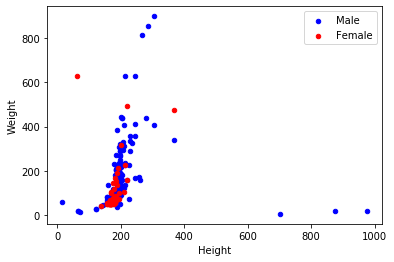

In [15]:
male_heroes = join_df[join_df['Gender'] == 'Male']
female_heroes = join_df[join_df['Gender'] == 'Female']
ax = male_heroes.plot.scatter(x='Height', y='Weight', label='Male', c='blue')
female_heroes.plot.scatter(x='Height', y='Weight', label='Female', c='red', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [16]:
male_heroes_df = male_heroes[['Height', 'Weight']]
female_heroes_df = female_heroes[['Height', 'Weight']]

def show_distplot(dataframe, gender, column_name):
    dataframe[column_name].plot.hist()
    plt.title('{} distribution of {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

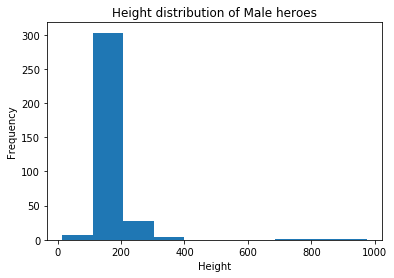

In [17]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

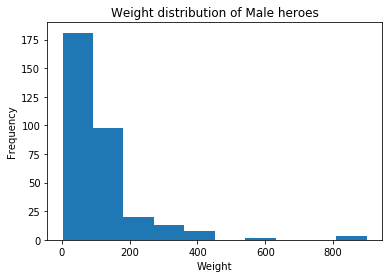

In [18]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

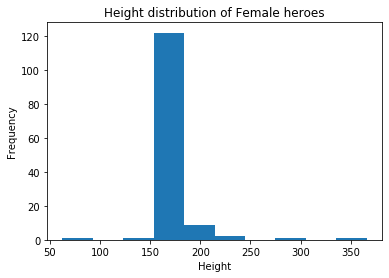

In [19]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

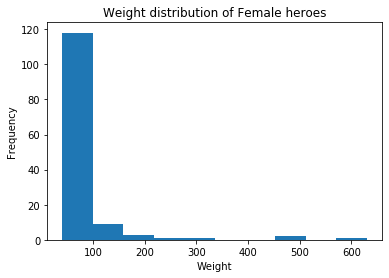

In [20]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

In [21]:
display(male_heroes_df.describe())
female_heroes_df.describe()

,Height,Weight
count,344.000000,325.000000
mean,192.462209,126.501538
std,69.915757,112.705604
min,15.200000,2.000000
25%,180.000000,79.000000
50%,185.000000,90.000000
75%,193.000000,124.000000
max,975.000000,900.000000


,Height,Weight
count,137.000000,135.000000
mean,174.748175,79.859259
std,24.280160,78.818435
min,62.500000,41.000000
25%,168.000000,54.000000
50%,170.000000,58.000000
75%,178.000000,66.000000
max,366.000000,630.000000


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



The males and females have relatively the same height, within 20 units.  The male heights and weights are more disperse than the females.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [22]:
join_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omnipresent,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0


In [23]:
#Test code to write a top 5 function
#marvel = join_df[join_df['Publisher'] == 'Marvel Comics']
#dc_uni = join_df[join_df['Publisher'] == 'DC Comics']
#test = join_df.select_dtypes(include=bool).is_copy()
#test_list = list(test.select_dtypes(include=bool).columns.values)
#for col in test_list:
#    test[col] = test[col].map({True : 1, False : 0})
        
#pwr_dict = dict(test[test_list].sum())
#pwr_sort = dict(sorted(pwr_dict.items(), key= lambda x: x[1], reverse=True)[:5])
#pwr_plot_series = pd.Series(data=pwr_sort)



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  after removing the cwd from sys.path.


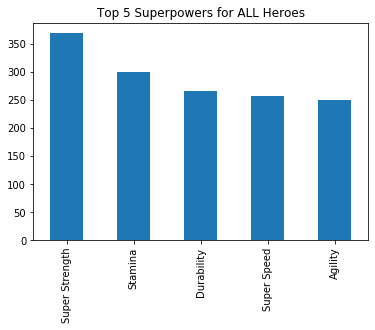

In [24]:
def top_5_func(df_or_series, df_title):

    powers_list = list(df_or_series.columns)[:-8]
    pwr_df = df_or_series   
    for col in powers_list:
        pwr_df[col] = pwr_df[col].map({True : 1, False : 0})
        
    pwr_dict = dict(pwr_df[powers_list].sum())
    pwr_sort = dict(sorted(pwr_dict.items(), key= lambda x: x[1], reverse=True)[:5])
    pwr_plot_series = pd.Series(data=pwr_sort)
    
    return(pwr_plot_series.plot.bar(title= 'Top 5 Superpowers for {} Heroes'.format(df_title.upper())))
top_5_func(join_df, 'all')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


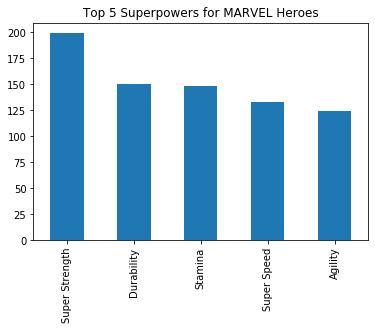

In [25]:
top_5_func(marvel, 'marvel')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


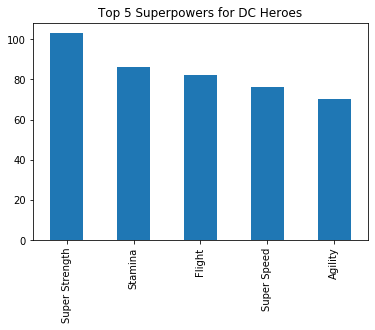

In [26]:
top_5_func(dc_uni, 'dc')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

Superstrength showed to be the most common power amongst all superheroes.  Durablilty and Flight were the only major diffeneces between the two publishers.

In [27]:
#relationship between height and weight, and powerset

In [28]:
join_df.Height.describe()

count    490.000000
mean     187.237755
std       60.576189
min       15.200000
25%      173.500000
50%      183.000000
75%      190.250000
max      975.000000
Name: Height, dtype: float64

In [126]:
#testing code
#ptile_list = list(join_df['Height'].quantile([.25, .5, .75]).values)
#height_25 = ptile_list[0]
#height_50 = ptile_list[1]
#height_75 = ptile_list[2]
#height_25_df = join_df[join_df['Height'].between(height_25, height_50)]
#powers = list(join_df.columns)[:-8]
#height_50_df = join_df[join_df['Height'].between(height_50, height_75)]
#height_75_df = join_df[join_df['Height'] >= height_75]
#height_25_dict = dict(height_25_df[powers].sum())
#height_25_series = pd.Series(data=height_25_dict)
#height_25_series.sort_values(ascending=False)[5:10]

def super_powers_by_cat(df, category):
    category = category.title()
    low_cat = df[category].quantile(.25)
    mid_cat = df[category].quantile(.50)
    high_cat = df[category].quantile(.75)
    
    pwrs_list = list(df.columns)[:-8]
    
    df_low = df[df[category].between(low_cat, mid_cat)]
    df_mid = df[df[category].between(mid_cat, high_cat)]
    df_high = df[df[category] >= high_cat]
        
    dict_low = dict(df_low[pwrs_list].sum())
    dict_med = dict(df_mid[pwrs_list].sum())
    dict_high = dict(df_high[pwrs_list].sum())
    
    low_series = pd.Series(data=dict_low).sort_values(ascending=False)[:10]
    mid_series = pd.Series(data=dict_med).sort_values(ascending=False)[:10]
    high_series = pd.Series(data=dict_high).sort_values(ascending=False)[:10]
    
    fig, axes = plt.subplots(nrows=3)
    fig.subplots_adjust(hspace=2)
    
    
    return(low_series.plot(kind='bar', ax=axes[0], figsize=(25,13), rot=0, fontsize=12, title='Superpowers for Lower {} Heroes'.format(category)),
           mid_series.plot(kind='bar', ax=axes[1], figsize=(25,13), rot=0, fontsize=12, title='Superpowers for Mid {} Heroes'.format(category)),
           high_series.plot(kind='bar', ax=axes[2], figsize=(25,13), rot=0, fontsize=12, title='Superpowers for Higher {} Heroes'.format(category)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1a25b5eba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24ce7780>)

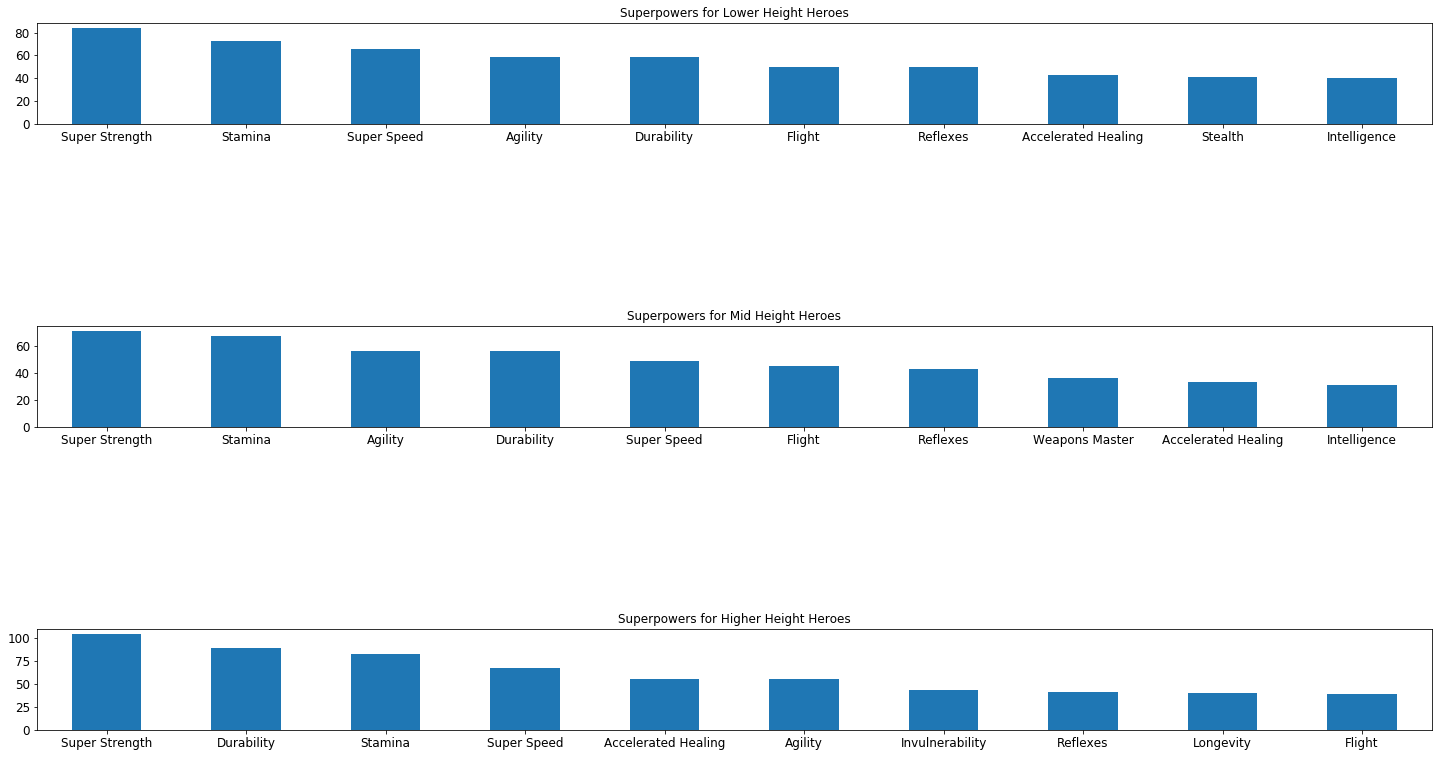

In [133]:
super_powers_by_cat(join_df, 'height')

(<matplotlib.axes._subplots.AxesSubplot at 0x1a262fe0b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a26ec23c8>)

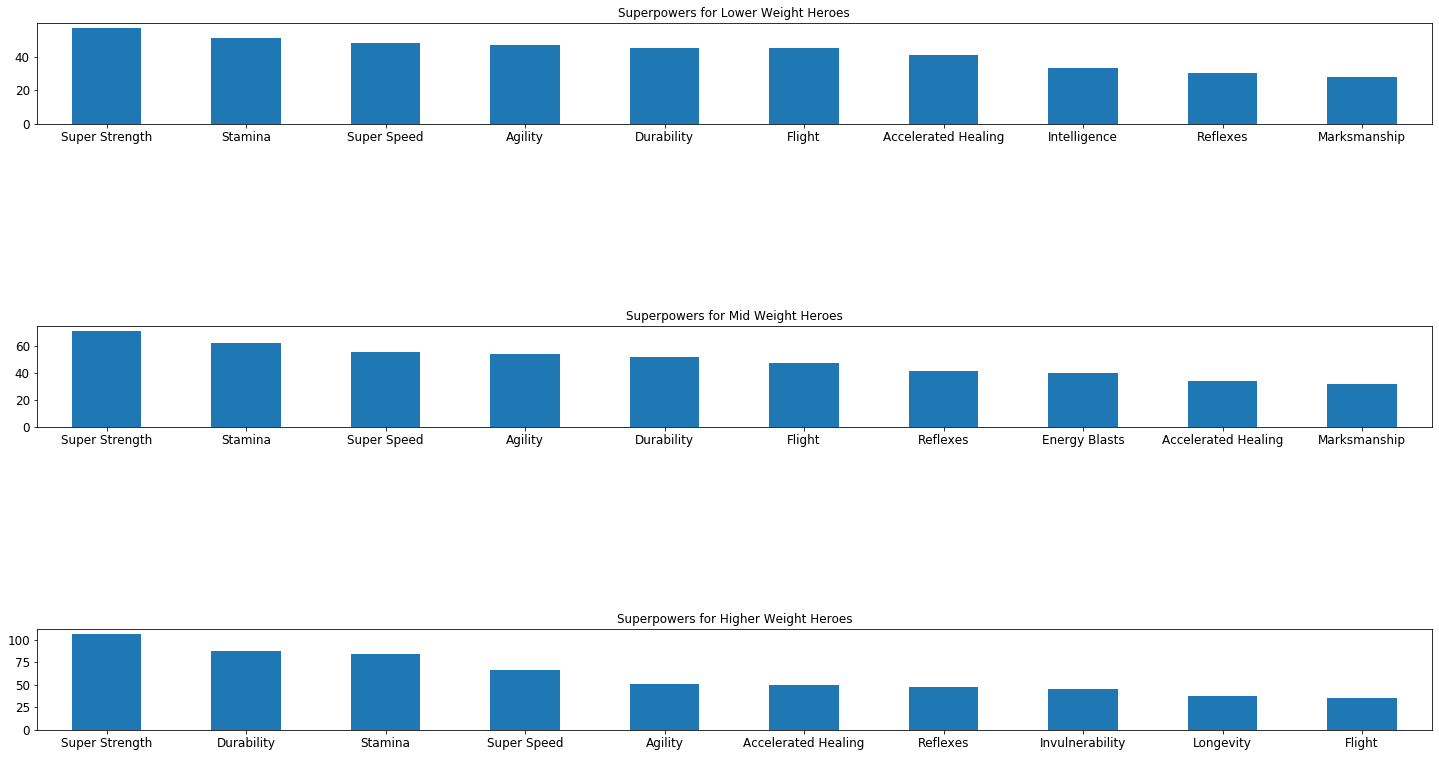

In [128]:
super_powers_by_cat(join_df, 'weight')

In [139]:
join_df[join_df['Durability'] == 1][['Height', 'Weight']]

,Height,Weight
A-Bomb,203.0,441.0
Abe Sapien,191.0,65.0
Absorbing Man,193.0,122.0
Adam Strange,185.0,88.0
Alien,244.0,169.0
...,...,...
Wonder Girl,165.0,51.0
Wonder Man,188.0,171.0
Wonder Woman,183.0,74.0
X-23,155.0,50.0


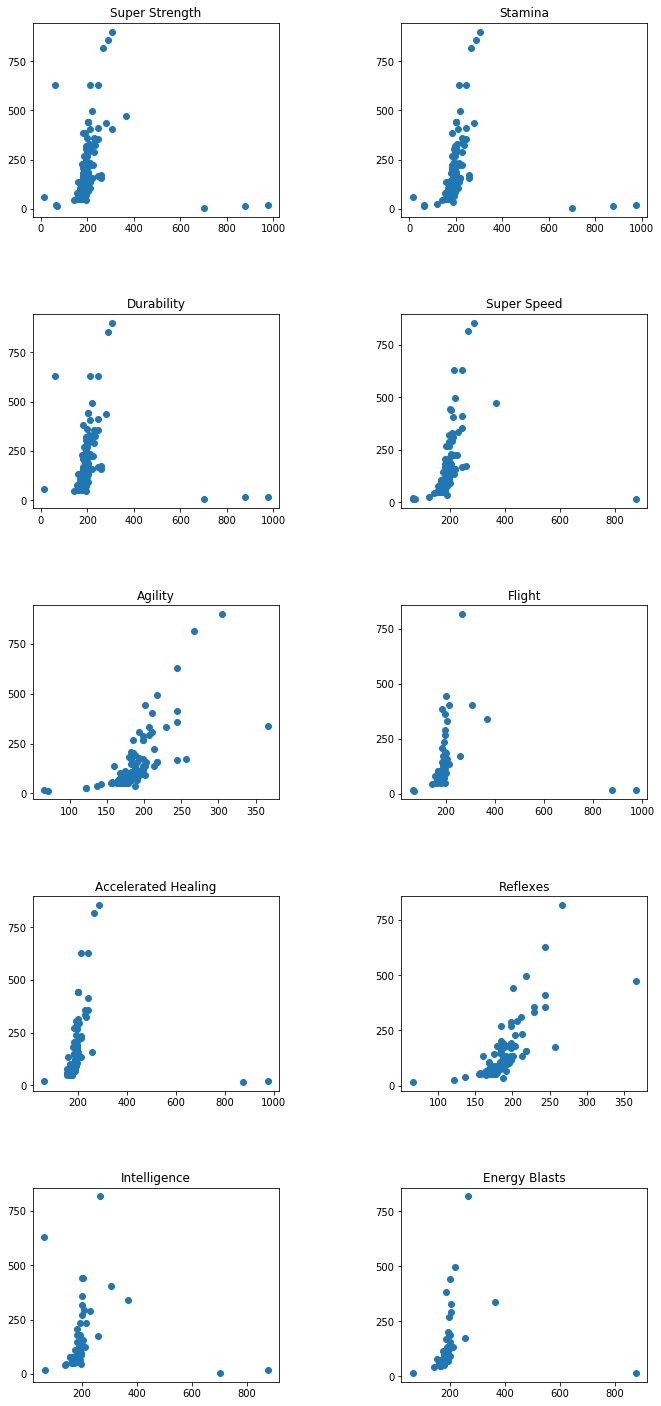

In [172]:
#pwr_dict = dict(pwr_df[powers_list].sum())
#pwr_sort = dict(sorted(pwr_dict.items(), key= lambda x: x[1], reverse=True)[:5])

most_super = dict(join_df[list(join_df.columns.values)[:-8]].sum())
most_super = dict(sorted(most_super.items(), key= lambda x: x[1], reverse=True)[:10])
most_pwrs_list = list(most_super.keys())

fig = plt.figure(figsize=(11,25))

fig.subplots_adjust(hspace=.5, wspace=.5)


for col, num in zip(most_pwrs_list, range(1, 11)):
    df0 = join_df[join_df[col] == 1][['Height', 'Weight']]
    ax = fig.add_subplot(5, 2, num)
    ax.scatter(df0['Height'].values, df0['Weight'].values)
    ax.set_title(col)
    ax.yaxis.set_ticks(np.arange(0,1000,250))
    
plt.show()


There is an apparent correlation between height and weight within the most common superpowers.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data